Import Libraries

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pandas.core.algorithms import duplicated
from xarray.util.generate_ops import inplace

warnings.filterwarnings('ignore')

Common Functions

In [383]:
# Drops the specified columns from the given DataFrame.
def drop_columns(dataframe, columns):
    """
    Drops the specified columns from the given DataFrame.

    Args:
        dataframe (pd.DataFrame): The DataFrame to drop columns from.
        columns (list): List of column names to drop.

    Returns:
        pd.DataFrame: The modified DataFrame with specified columns dropped.
    """
    dataframe.drop(columns=columns, inplace=True)
    return dataframe

In [384]:
def create_boxplot(data, column, title=None):
    """
    Plots a boxplot for a specific column in the dataframe.

    Parameters:
    - data: pd.DataFrame, the dataframe containing the data
    - column: str, the name of the column to plot
    - title: Optional[str], the title of the plot (default: None)

    Returns:
    - None
    """
    sns.boxplot(data[column])

    # Add title if provided, otherwise use a default one
    if title:
        plt.title(title)
    else:
        plt.title(f"Boxplot of {column}")

    plt.show()

In [385]:
def get_distinct_values(data, column):
    """
    Returns the distinct values of a specific column in the DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column: str, the name of the column to retrieve distinct values from

    Returns:
    - A numpy array of distinct values
    """
    return data[column].unique().tolist()

In [386]:
def get_value_counts(data, column):
    """
    Returns the counts of unique values in a specific column of the DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column: str, the name of the column to retrieve value counts from

    Returns:
    - A pandas Series with unique values as the index and their counts as the values
    """
    return data[column].value_counts()

Reading data from the provided load CSV file

In [387]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [388]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Check whether null values and how much they are in the loan data

In [389]:
loan.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

Count columns which having more than 50% of null value itself

In [390]:
# Count the number of columns with 50% null values
missing_values_threshold = 50
missing_values_threshold_percentage = missing_values_threshold/100
total_null_columns = (loan.isnull().mean() > missing_values_threshold_percentage).sum()

print(f"Number of columns with more than {missing_values_threshold}% null values: {total_null_columns}/{loan.shape[1]}")

Number of columns with more than 50% null values: 57/111


Decided to drop columns having more than 50% null column

In [391]:
loan = loan.loc[:, loan.isnull().mean() < missing_values_threshold_percentage]
loan.shape

(39717, 54)

Drop all unnecessary columns

In [392]:
# List of columns to drop
unnecessary_columns_to_drop = [
    # Unique Identifiers
    'id', 'member_id',

    # System Metadata
    'url', 'desc', 'policy_code', 'application_type',

    # Redundant Features
    'funded_amnt', 'funded_amnt_inv', 'installment',

    # Irrelevant
    'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'last_credit_pull_d',
   'emp_title',
    'initial_list_status',
    'pymnt_plan',
    'earliest_cr_line',
    'inq_last_6mths',
    'open_acc',
    'out_prncp',
    'out_prncp_inv',
     'pub_rec',
     'recoveries',
     'revol_bal',
     'revol_util',
     'title',
     'total_acc',
     'total_pymnt_inv',
     'total_rec_late_fee',
     'url',
     'zip_code'
]
drop_columns(loan, unnecessary_columns_to_drop)
loan.shape

(39717, 21)

### **Check Duplicates**

In [393]:
duplicated_sum =  loan.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_sum}")

Number of duplicated rows: 0


### **Check Single Unique Value Columns**

In [394]:
# Check for single unique value columns
single_unique_cols = loan.columns[loan.nunique() == 1]

# Print the names of columns with a single unique value
print(f"Columns with a single unique value: {single_unique_cols.shape[0]}")


Columns with a single unique value: 5


### **Drop Single Unique Value Columns**

In [395]:
drop_columns(loan, single_unique_cols)
loan.shape

(39717, 16)

In [396]:
loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,pub_rec_bankruptcies
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
4,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,0.0


Drop loan status as 'Current'

In [397]:
# Drop rows where loan_status is 'Current'
loan.drop(loan[loan['loan_status'].str.strip().str.lower() == 'current'].index, inplace=True)
loan.shape

(38577, 16)

Check datatype

In [398]:
loan.dtypes

loan_amnt                 int64
term                     object
int_rate                 object
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
pub_rec_bankruptcies    float64
dtype: object

Convert data type

In [399]:
loan = loan.astype({
    'loan_amnt' : 'float'
})

Convert data

In [400]:
# Convert term value  to number only (int)
loan['term'] = loan['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [401]:
# Convert term value  to number only (float)
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [402]:
# Convert and extract month and year
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_month'] = loan['issue_d'].dt.strftime('%B')
loan['issue_year'] = loan['issue_d'].dt.year
drop_columns(loan, ['issue_d'])

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,pub_rec_bankruptcies,issue_month,issue_year
0,5000.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,0.0,December,2011
1,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,0.0,December,2011
2,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,0.0,December,2011
3,10000.0,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,0.0,December,2011
5,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,0.0,December,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,36,8.07,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,NaN,July,2007
39713,8500.0,36,10.28,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,NaN,July,2007
39714,5000.0,36,8.07,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,NaN,July,2007
39715,5000.0,36,7.43,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,0,NaN,July,2007


In [403]:
# Convert float values to 2 decimals.
for col in ['loan_amnt', 'int_rate', 'annual_inc', 'dti']:
    loan[col] = loan[col].apply(lambda x: round(x, 2))

In [404]:
distinct_values = loan['home_ownership'].unique()

print(f"Distinct values in the column: {distinct_values}")

Distinct values in the column: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


Remove outliers

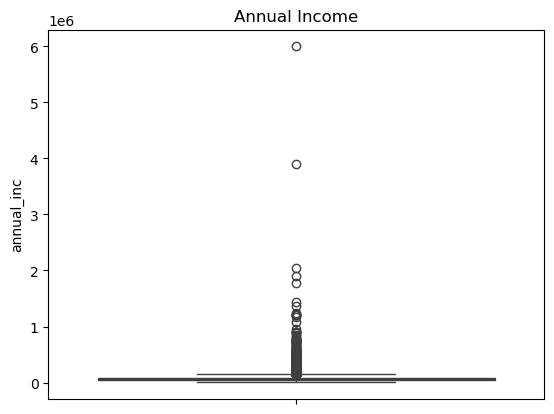

In [405]:
# Visualizing annual income
create_boxplot(
    loan,
    'annual_inc',
    'Annual Income')

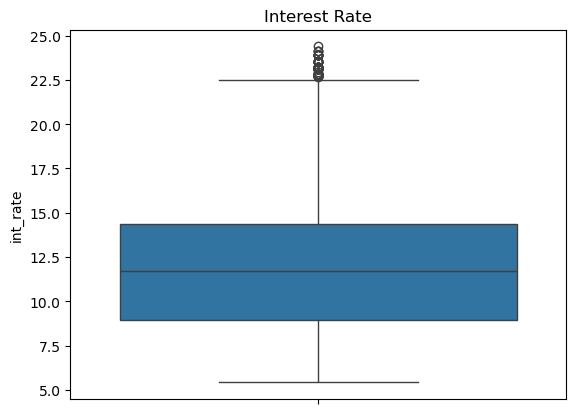

In [406]:
create_boxplot(
    loan,
    'int_rate',
    'Interest Rate')

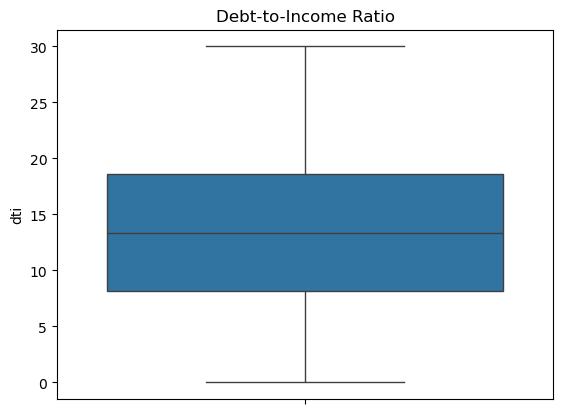

In [407]:
create_boxplot(
    loan,
    'dti',
    'Debt-to-Income Ratio')

Can see that annual income having outliers. Outliers tend to lie far from the median. Use **Interquartile Range (IQR)** for skewed data.

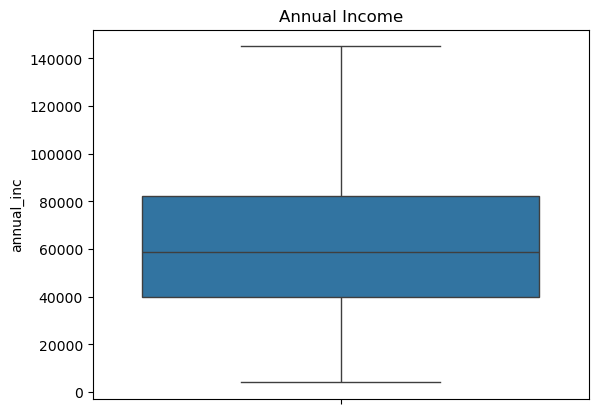

In [408]:
# Calculate inter quartile
annual_income = loan['annual_inc']
Q1 = annual_income.quantile(0.25)
Q3 = annual_income.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


 # Handle Outliers
loan['annual_inc'] = annual_income.clip(lower=lower_bound, upper=upper_bound)
# Visualize Outliers (Boxplot)
create_boxplot(
    loan,
    'annual_inc',
    'Annual Income')



Handle data for verification_status column

In [409]:
# Get distinct values of a column
get_distinct_values(loan, 'verification_status')


['Verified', 'Source Verified', 'Not Verified']

Can see that Verified and Source Verified are both the same meaning so replacing all Source Verified to Verified

In [410]:
loan['verification_status'].replace('Source Verified', 'Verified', inplace = True)
get_distinct_values(loan, 'verification_status')

['Verified', 'Not Verified']

Handle data for home_ownership column

In [411]:
get_value_counts(loan, 'home_ownership')

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

NONE can be treated as OTHER

In [412]:
loan['home_ownership'].replace('NONE', 'OTHER', inplace = True)
get_distinct_values(loan, 'home_ownership')


['RENT', 'OWN', 'MORTGAGE', 'OTHER']

In [414]:
loan.isna().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
loan_amnt                  0
loan_status                0
issue_month                0
delinq_2yrs                0
dti                        0
addr_state                 0
purpose                    0
verification_status        0
term                       0
annual_inc                 0
home_ownership             0
sub_grade                  0
grade                      0
int_rate                   0
issue_year                 0
dtype: int64

In [415]:
get_distinct_values(loan, 'emp_length')

['10+ years',
 '< 1 year',
 '3 years',
 '8 years',
 '9 years',
 '4 years',
 '5 years',
 '1 year',
 '6 years',
 '2 years',
 '7 years',
 nan]